Cleansing 

In [2]:
# import pandas as pd
# import numpy as np

# df = pd.read_csv("Drinking_Water.csv")

# # Useful Columns
# keep_columns = [
#     "Countries", "Location", "Source", 
#     "Concentration", "Concentration_Units",
#     "Approximate_Latitude", "Approximate_Longitude",
#     "DOI", "Sample_ID"
# ]
# df_clean = df[keep_columns].copy()

# # Useless Columns
# df_clean = df_clean[
#     df_clean["Concentration"].notna() & 
#     df_clean["Concentration_Units"].notna() & 
#     (
#         df_clean["Countries"].notna() | 
#         (df_clean["Approximate_Latitude"].notna() & df_clean["Approximate_Longitude"].notna())
#     )
# ]

# df_clean = df_clean[df_clean["Concentration"].apply(lambda x: str(x).replace(".", "").isdigit())]
# df_clean["Concentration"] = pd.to_numeric(df_clean["Concentration"], errors="coerce")

# # Conversioning
# conversion_map = {
#     "particles/0.33 L": 3.03,
#     "particles/L": 1.0,
# }
# df_clean["Unit_Factor"] = df_clean["Concentration_Units"].map(conversion_map)

# # Remove NA
# df_clean = df_clean.dropna(subset=["Unit_Factor"])

# # Conversioning
# df_clean["Microplastic_Concentration_L"] = df_clean["Concentration"] * df_clean["Unit_Factor"]


# df_clean = df_clean.drop(columns=["Concentration", "Concentration_Units", "Unit_Factor"])
# df_clean = df_clean.rename(columns={"Countries": "Country"})
# df_clean.to_csv("Cleaned_Drinking_Water.csv", index=False)


   Country Location         Source  Approximate_Latitude  \
0  Germany  Germany  bottled water             51.163818   
1  Germany  Germany  bottled water             51.163818   
2  Germany  Germany  bottled water             51.163818   
3  Germany  Germany  bottled water             51.163818   
5  Germany  Germany  bottled water             51.163818   

   Approximate_Longitude                           DOI  \
0              10.447831  10.1016/j.watres.2017.11.011   
1              10.447831  10.1016/j.watres.2017.11.011   
2              10.447831  10.1016/j.watres.2017.11.011   
3              10.447831  10.1016/j.watres.2017.11.011   
5              10.447831            10.1039/c6ay01184e   

                        Sample_ID  Microplastic_Concentration_L  
0  1|10.1016/j.watres.2017.11.011                         14.00  
1  2|10.1016/j.watres.2017.11.011                        118.00  
2  3|10.1016/j.watres.2017.11.011                         50.00  
3  4|10.1016/j.watres.2017

In [3]:
# # Cleansing Marine_Microplastics
# import pandas as pd
# df = pd.read_csv("Marine_Microplastics.csv")

# # Good Columns
# keep_columns = [
#     "Measurement", "Unit", "Latitude", "Longitude", "Date",
#     "Oceans", "Regions", "SubRegions", "Sampling Method", "Density Class"
# ]
# df_clean = df[keep_columns].copy()

# # Cleaning
# df_clean = df_clean.dropna(subset=["Measurement", "Latitude", "Longitude", "Date"])

# # Data with correct unit
# df_clean = df_clean[df_clean["Unit"].str.lower().str.strip() == "pieces/m3"]

# # Coverting to useable time
# df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")

# df_clean = df_clean.reset_index(drop=True)
# df_clean.to_csv("Cleaned_Marine_Microplastics.csv", index=False)

/var/folders/qn/0kjg3cx11y7dgt7l6hd375zm0000gn/T/ipykernel_25675/1604224787.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")


   Measurement       Unit   Latitude   Longitude       Date          Oceans  \
0        0.000  pieces/m3   6.350000 -121.850000 2002-12-18   Pacific Ocean   
1        0.013  pieces/m3   0.500000  -95.350000 2006-10-17   Pacific Ocean   
2     1368.000  pieces/m3   0.631825  -45.398158 2018-10-17  Atlantic Ocean   
3        0.001  pieces/m3  16.623000  -99.697800 2015-01-03   Pacific Ocean   
4        0.000  pieces/m3  19.770000  -81.060000 2007-03-15  Atlantic Ocean   

         Regions SubRegions  Sampling Method Density Class  
0            NaN        NaN      Neuston net      Very Low  
1            NaN        NaN        Manta net        Medium  
2            NaN        NaN  Aluminum bucket     Very High  
3            NaN        NaN      Grab sample           Low  
4  Caribbean Sea        NaN      Neuston net      Very Low  


/var/folders/qn/0kjg3cx11y7dgt7l6hd375zm0000gn/T/ipykernel_25675/3195440896.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




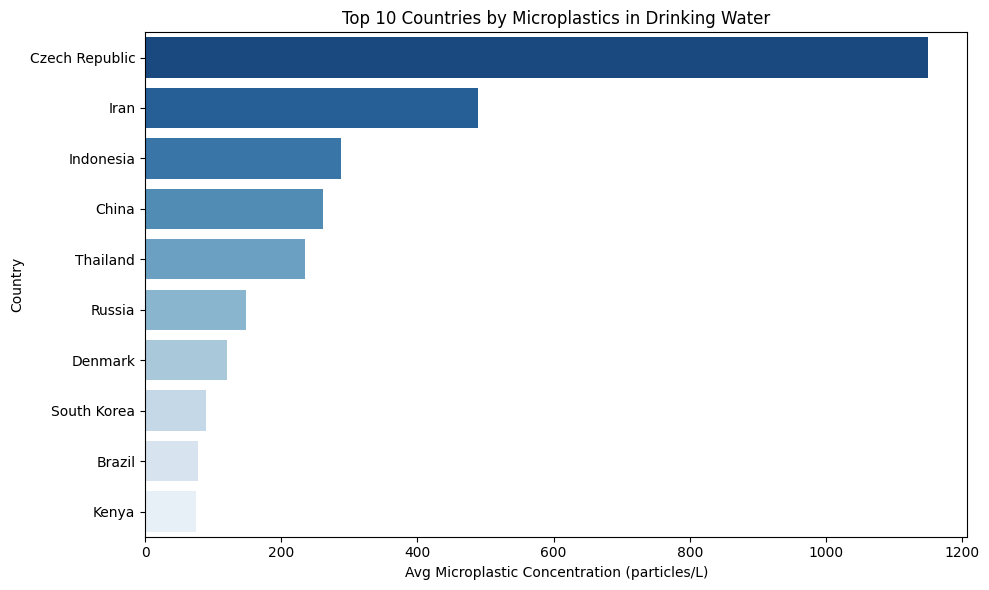

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned_Data/Cleaned_Drinking_Water.csv")

avg_by_country = df.groupby("Country")["Microplastic_Concentration_L"].mean().sort_values(ascending=False).head(10)

# Inverting blue palette to match other graph
reversed_palette = sns.color_palette("Blues", n_colors=10)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_by_country.values, y=avg_by_country.index, palette=reversed_palette)
plt.xlabel("Avg Microplastic Concentration (particles/L)")
plt.title("Top 10 Countries by Microplastics in Drinking Water")
plt.tight_layout()
plt.show()


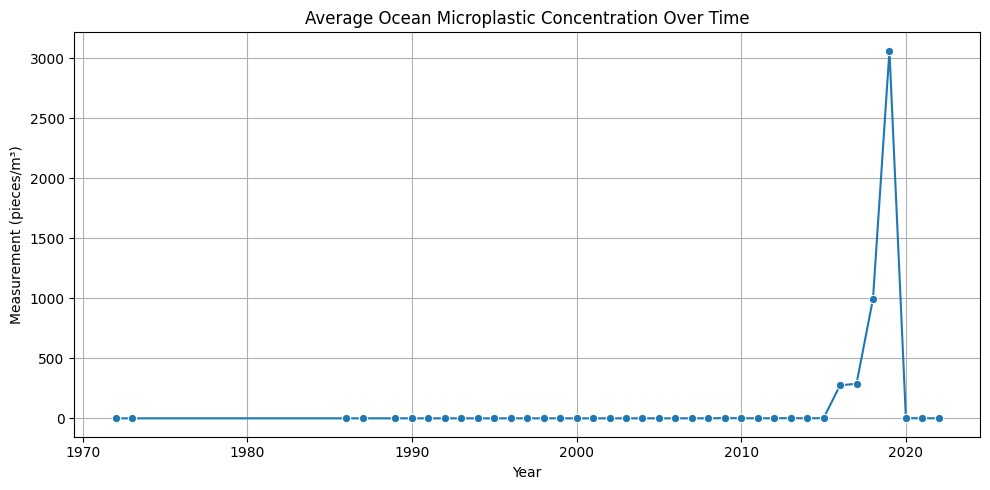

In [50]:
# Not a useful graph, time component needs removal

# df = pd.read_csv("Cleaned_Data/Cleaned_Marine_Microplastics.csv")
# df["Year"] = pd.to_datetime(df["Date"]).dt.year

# # Aggregate by year
# yearly_avg = df.groupby("Year")["Measurement"].mean()

# plt.figure(figsize=(10, 5))
# sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker="o")
# plt.title("Average Ocean Microplastic Concentration Over Time")
# plt.ylabel("Measurement (pieces/m³)")
# plt.xlabel("Year")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


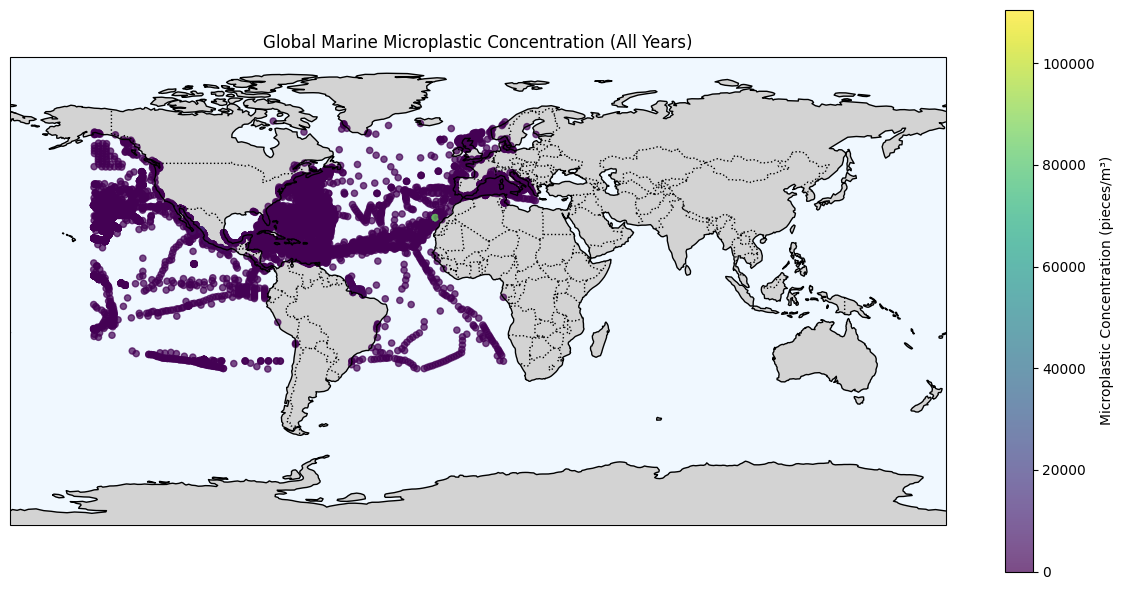

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv("Cleaned_Data/Cleaned_Marine_Microplastics.csv")

# q99 = df["Measurement"].quantile(0.99)
# df = df[df["Measurement"] <= q99]

# Creation
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Addation
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')

# Plotation
scatter = ax.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["Measurement"],
    cmap="viridis",
    s=20,
    alpha=0.7,
    transform=ccrs.PlateCarree()
)

plt.colorbar(scatter, orientation='vertical', label="Microplastic Concentration (pieces/m³)")
plt.title("Global Marine Microplastic Concentration (All Years)")
plt.tight_layout()
plt.show()


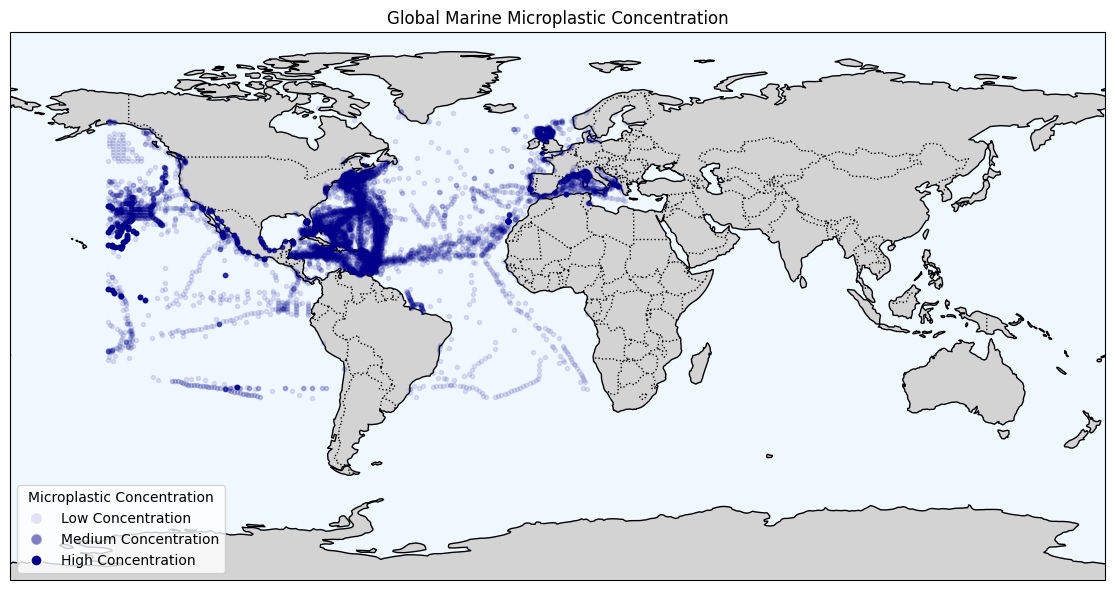

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.lines import Line2D

df = pd.read_csv("Cleaned_Data/Cleaned_Marine_Microplastics.csv")

# Normalize measurements to range (0.1, 1.0) for alpha thingy
alpha_values = df["Measurement"]
alpha_norm = (alpha_values - alpha_values.min()) / (alpha_values.max() - alpha_values.min())
alpha_scaled = 0.1 + 0.9 * alpha_norm  # scale

# Plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')

# Plot each point using this alpha scaling thingy
for lon, lat, alpha in zip(df["Longitude"], df["Latitude"], alpha_scaled):
    ax.plot(lon, lat, marker='o', color='darkblue', markersize=3, alpha=alpha, transform=ccrs.PlateCarree())

# Create key for alpha (transparency)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Low Concentration', markerfacecolor='darkblue', markersize=8, alpha=0.1),
    Line2D([0], [0], marker='o', color='w', label='Medium Concentration', markerfacecolor='darkblue', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='o', color='w', label='High Concentration', markerfacecolor='darkblue', markersize=8, alpha=1.0),
]
ax.legend(handles=legend_elements, loc='lower left', title="Microplastic Concentration")

plt.title("Global Marine Microplastic Concentration")
plt.tight_layout()
plt.show()
